In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
price_df = pd.read_csv("../data/price_data_flat.csv", parse_dates=["timestamp"])
price_df.head()

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap,Ticker
0,AAPL,2016-01-04 05:00:00+00:00,102.61,105.368,102.00,105.35,71935339.0,351452.0,104.007250,AAPL
1,AAPL,2016-01-05 05:00:00+00:00,105.75,105.850,102.41,102.71,58690536.0,321365.0,103.414304,AAPL
2,AAPL,2016-01-06 05:00:00+00:00,100.56,102.370,99.87,100.70,71079827.0,409164.0,100.847762,AAPL
3,AAPL,2016-01-07 05:00:00+00:00,98.68,100.130,96.43,96.45,85996453.0,462836.0,98.046209,AAPL
4,AAPL,2016-01-08 05:00:00+00:00,98.55,99.110,96.76,96.96,75066292.0,419555.0,97.916490,AAPL


In [17]:
price_df.interpolate(method='linear', inplace=True)


C:\Users\ayush\AppData\Local\Temp\ipykernel_14996\2909272161.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  price_df.interpolate(method='linear', inplace=True)


In [18]:
missing = price_df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [19]:
print(price_df.dtypes)


symbol                      object
timestamp      datetime64[ns, UTC]
open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
trade_count                float64
vwap                       float64
Ticker                      object
dtype: object


In [20]:
assets = [
    "AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "NVDA", "ADBE", "CRM", "INTC", "ORCL",
    "JPM", "BAC", "GS", "WFC", "MS", "AXP", "C", "BLK", "SCHW", "USB",
    "XOM", "CVX", "BP", "TTE", "COP", "PSX", "SLB", "HAL", "VLO", "MPC",
    "JNJ", "PFE", "MRK", "UNH", "LLY", "BMY", "ABBV", "CVS", "CI", "AMGN",
    "T", "VZ", "NFLX", "DIS", "NKE", "KO", "PEP", "MCD", "LOW", "HD"
]


In [21]:
returns = pd.read_csv("../data/returns.csv", parse_dates=["timestamp"])
returns.set_index('timestamp', inplace=True)


In [22]:
returns.describe()

,AAPL,ABBV,ADBE,AMGN,AMZN,AXP,BAC,BLK,BMY,BP,...,SLB,T,TSLA,TTE,UNH,USB,VLO,VZ,WFC,XOM
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,...,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,0.000775,0.000632,0.001157,0.000413,0.000513,0.000711,0.000571,0.000606,-0.000014,0.000280,...,0.000211,-0.000235,0.001291,0.000389,0.000886,0.000215,0.000657,-0.000020,0.000170,0.000296
std,0.024797,0.016662,0.021258,0.015236,0.029745,0.020305,0.020680,0.018076,0.015271,0.020710,...,0.026453,0.015464,0.043083,0.018967,0.016431,0.019676,0.026502,0.012478,0.020292,0.018409
min,-0.741522,-0.162524,-0.167932,-0.095846,-0.949003,-0.148187,-0.175911,-0.136546,-0.159851,-0.191040,...,-0.274214,-0.186827,-0.774862,-0.178208,-0.172769,-0.144405,-0.192209,-0.074978,-0.142117,-0.122248
25%,-0.007404,-0.007041,-0.007651,-0.007255,-0.008677,-0.007199,-0.009388,-0.007866,-0.007237,-0.009194,...,-0.012125,-0.006646,-0.016232,-0.009240,-0.006753,-0.007695,-0.011420,-0.006028,-0.009514,-0.008749
50%,0.000941,0.001025,0.001531,0.000278,0.001224,0.000805,0.000370,0.000832,0.000322,0.000000,...,-0.000252,0.000338,0.001347,0.000746,0.000811,0.000379,0.000765,0.000175,0.000000,0.000234
75%,0.010258,0.008349,0.011475,0.007906,0.011146,0.009314,0.010571,0.008988,0.007456,0.009237,...,0.011976,0.007032,0.019401,0.009769,0.008080,0.008407,0.012604,0.006243,0.009376,0.009144
max,0.119808,0.137673,0.177193,0.108977,0.135359,0.218823,0.163164,0.135239,0.068419,0.216053,...,0.199080,0.084758,0.198949,0.152756,0.127989,0.173679,0.312025,0.092705,0.145347,0.126868


In [23]:
# Apply Winsorization across all returns
returns_winsorized = returns.clip(lower=returns.quantile(0.01),
                                  upper=returns.quantile(0.99),
                                  axis=1)
returns_winsorized.to_csv("../data/returns_clean.csv")


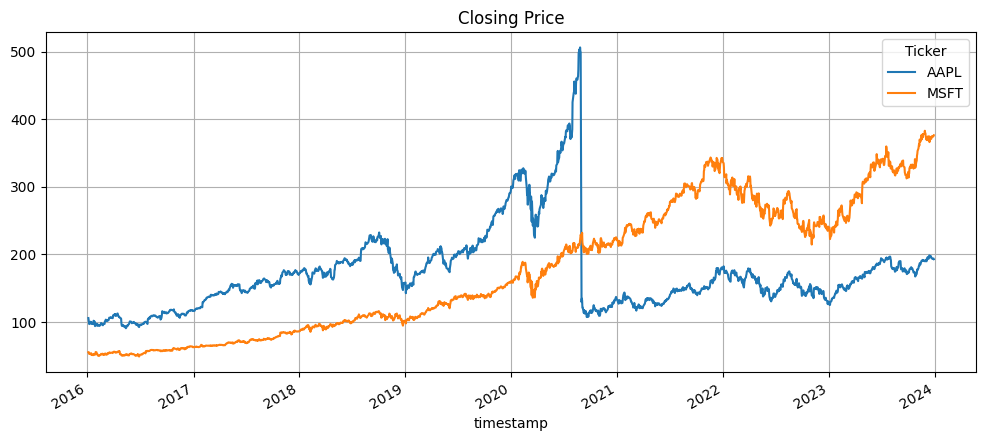

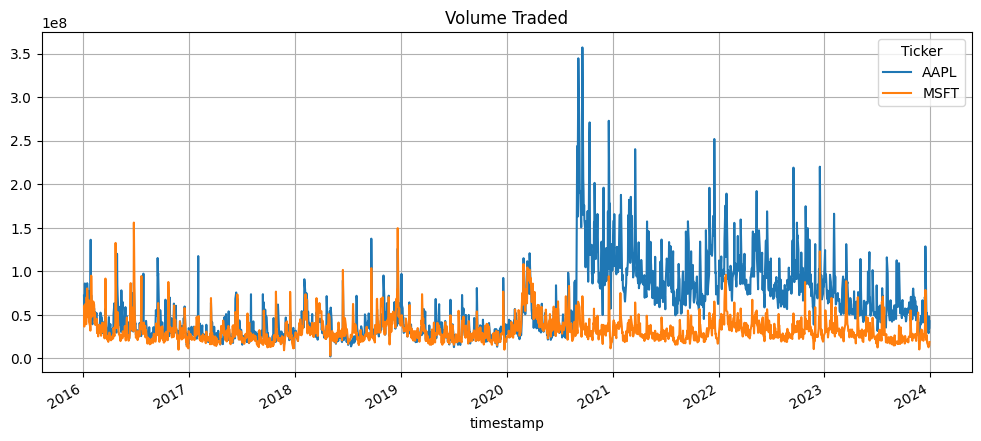

In [24]:
# Plot 'Close' prices
close_df = price_df.pivot(index='timestamp', columns='Ticker', values='close')
close_df[['AAPL', 'MSFT']].plot(figsize=(12, 5), title="Closing Price")
plt.grid()
plt.show()

# Plot 'Volume'
volume_df = price_df.pivot(index='timestamp', columns='Ticker', values='volume')
volume_df[['AAPL', 'MSFT']].plot(figsize=(12, 5), title="Volume Traded")
plt.grid()
plt.show()


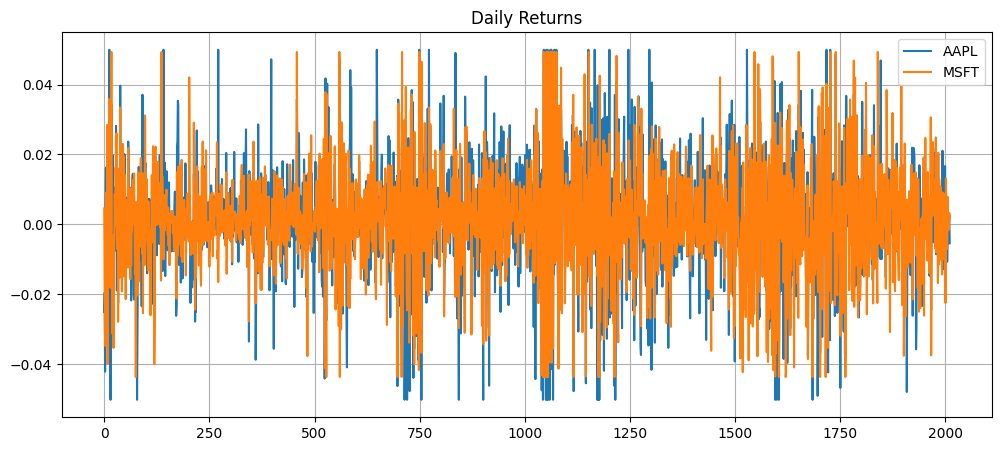

In [25]:
returns = pd.read_csv("../data/returns_clean.csv", parse_dates=["timestamp"])
selected_assets = ["AAPL", "MSFT"]  
returns[selected_assets].plot(figsize=(12, 5), title="Daily Returns")
plt.grid()
plt.show()
